<a href="https://colab.research.google.com/github/medinaalonso/Test_Stocks/blob/main/Python_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("test_quotes.txt",delimiter=",").reset_index()

In [3]:
dataset = dataset.rename(columns={dataset.columns[1]:'timestamp', dataset.columns[2]:'CUSIP',dataset.columns[3]:'price'})

In [4]:
dataset = dataset.drop(columns = ['index'])

In [5]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

In [6]:
#list of unique stocks
stocks = list(dataset['CUSIP'].unique())
#ordered by time
ordered_df = dataset.sort_values('timestamp')

In [7]:
max_values = ordered_df.groupby('CUSIP').max().reset_index() #max values
min_values = ordered_df.groupby('CUSIP').min().reset_index() #min values

In [8]:
#joining
maxmin_values = max_values.join(min_values.set_index('CUSIP'),on='CUSIP',rsuffix='_lower')

In [9]:
#calculating profit
maxmin_values['profit'] = maxmin_values['price']-maxmin_values['price_lower']
profits = maxmin_values.sort_values('profit', ascending=False).reset_index()

In [10]:
profits

,index,CUSIP,timestamp,price,timestamp_lower,price_lower,profit
0,62,652526203,2021-07-22 03:40:51.523222330,5690.99,2021-07-22 03:40:51.522762031,4361.31,1329.68
1,14,09253Y100,2021-07-22 03:40:51.523224773,4332.49,2021-07-22 03:40:51.522759034,3085.40,1247.09
2,15,09255R202,2021-07-22 03:40:51.523222896,5345.71,2021-07-22 03:40:51.522766245,4168.60,1177.11
3,50,501147102,2021-07-22 03:40:51.523226695,5798.66,2021-07-22 03:40:51.522759081,4721.31,1077.35
4,23,18978W109,2021-07-22 03:40:51.523230049,4952.68,2021-07-22 03:40:51.522760663,3961.15,991.53
...,...,...,...,...,...,...,...
95,54,53635B107,2021-07-22 03:40:51.523227625,244.11,2021-07-22 03:40:51.522764843,202.73,41.38
96,32,29668H708,2021-07-22 03:40:51.523227995,160.36,2021-07-22 03:40:51.522758004,139.28,21.08
97,46,45174J509,2021-07-22 03:40:51.523224888,99.73,2021-07-22 03:40:51.522758921,89.19,10.54
98,58,578605107,2021-07-22 03:40:51.523229223,50.68,2021-07-22 03:40:51.522764054,41.55,9.13


In [11]:
print("                   TOP 10 STOCKS")
for i,j in profits.iterrows():
  if i <=9:
    print(i,'\.','profit: ', j['profit'], 'CUSIP: ',j['CUSIP'])

                   TOP 10 STOCKS
0 \. profit:  1329.6799999999994 CUSIP:  652526203
1 \. profit:  1247.0899999999997 CUSIP:  09253Y100
2 \. profit:  1177.1099999999997 CUSIP:  09255R202
3 \. profit:  1077.3499999999995 CUSIP:  501147102
4 \. profit:  991.5300000000002 CUSIP:  18978W109
5 \. profit:  908.8199999999997 CUSIP:  47012E403
6 \. profit:  905.0699999999997 CUSIP:  265334102
7 \. profit:  866.4099999999994 CUSIP:  53216B104
8 \. profit:  856.2800000000002 CUSIP:  19239V302
9 \. profit:  841.56 CUSIP:  337930705


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


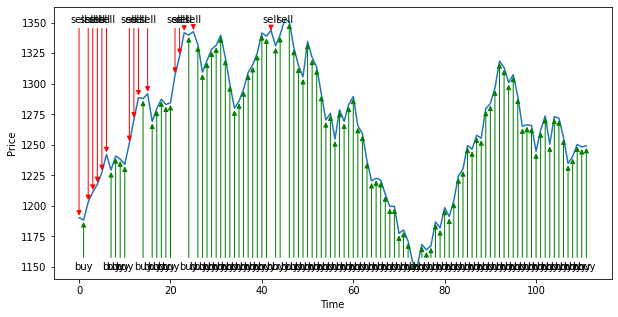

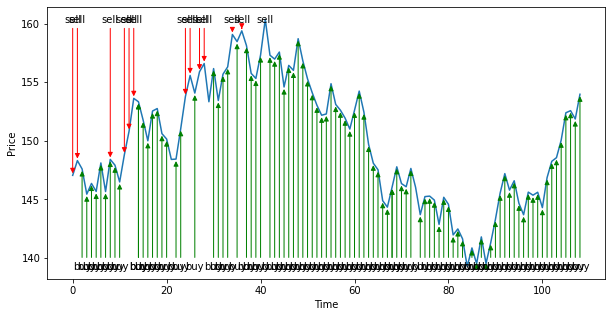

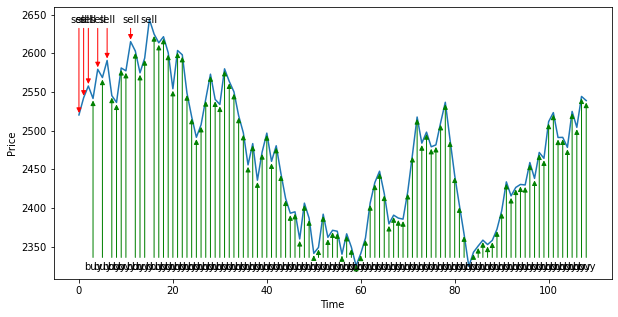

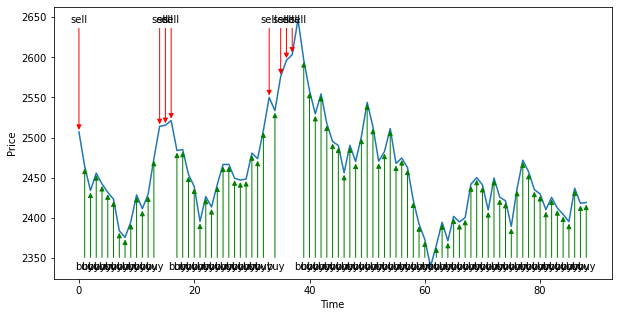

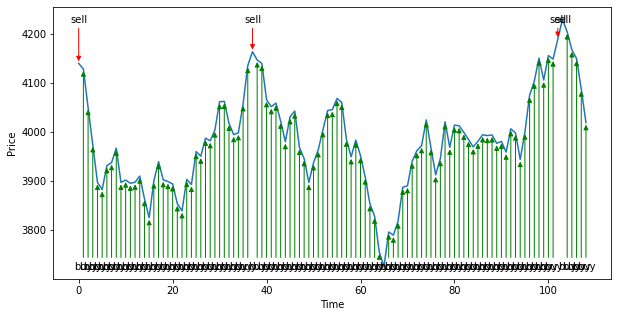

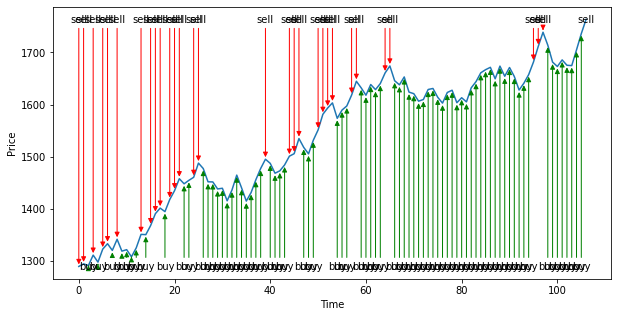

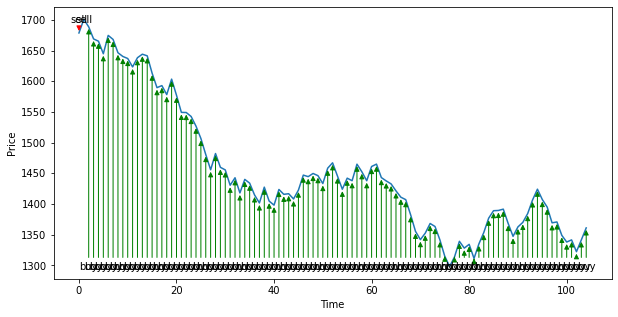

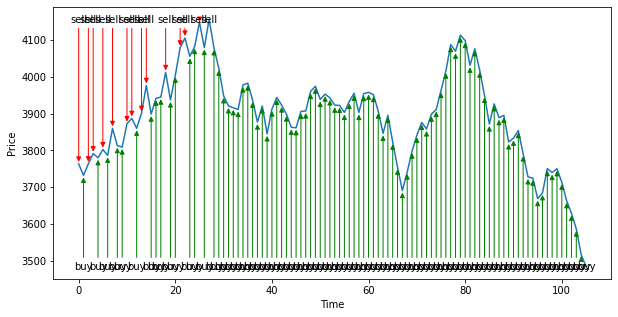

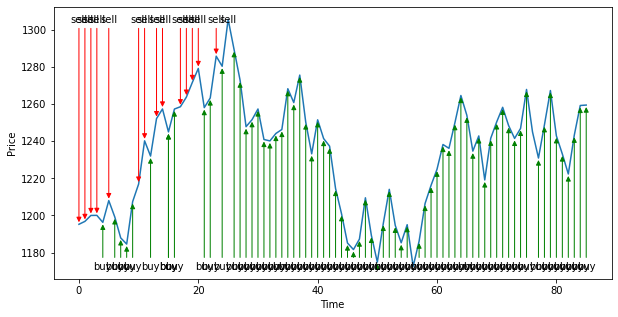

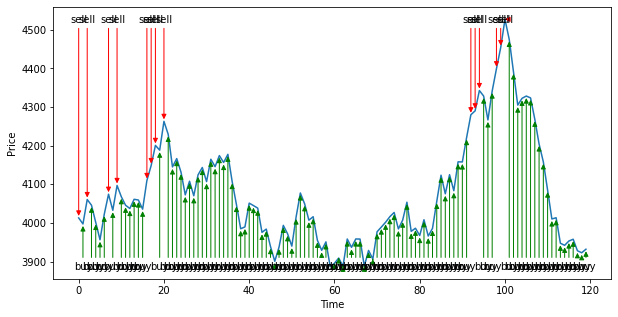

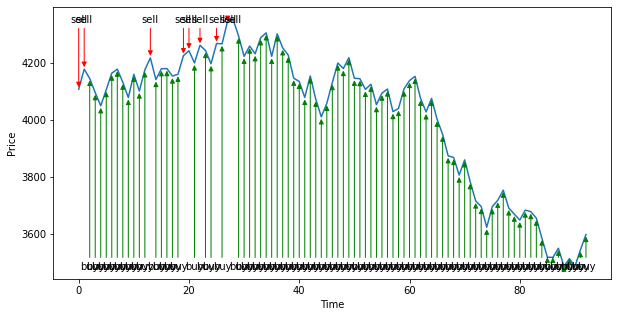

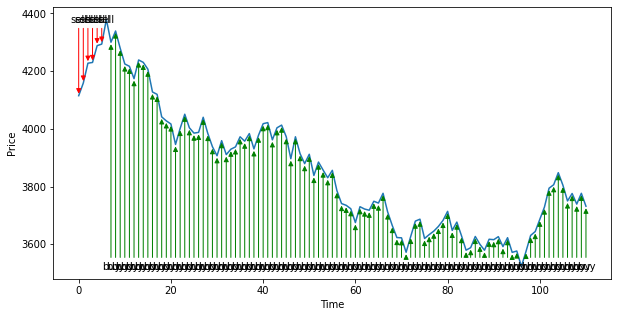

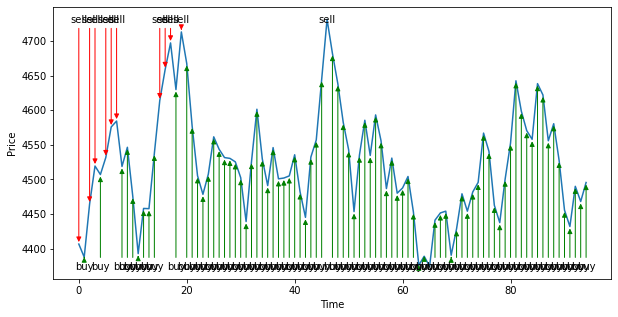

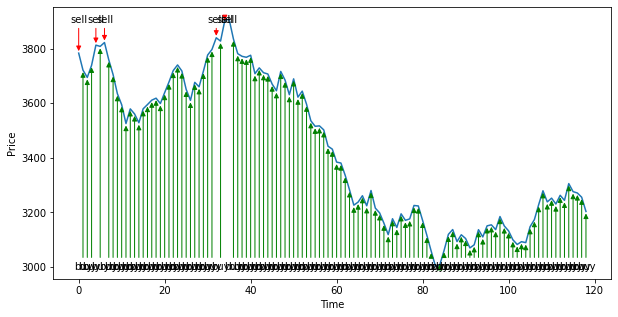

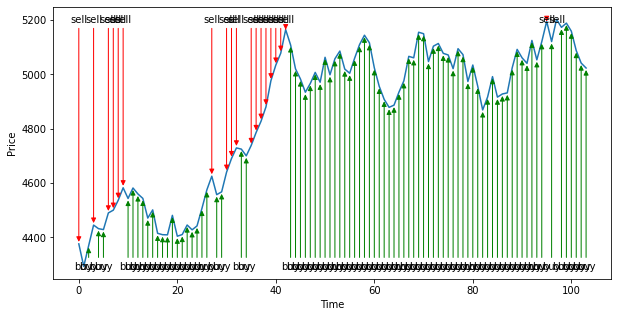

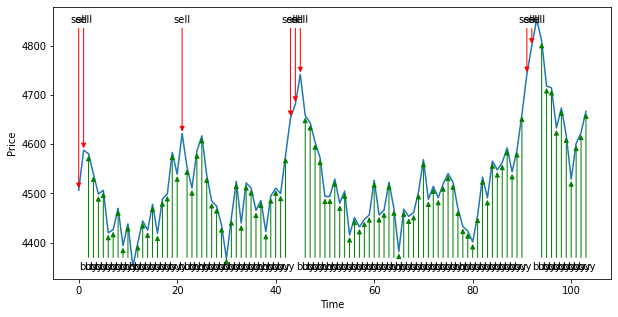

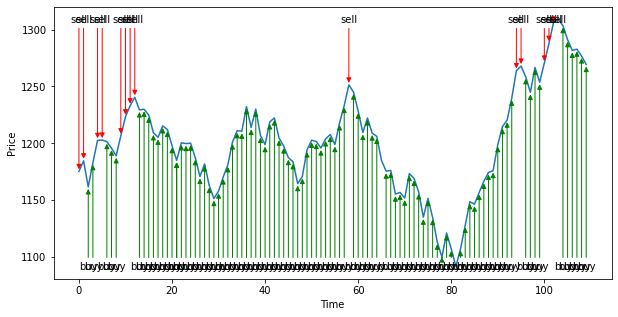

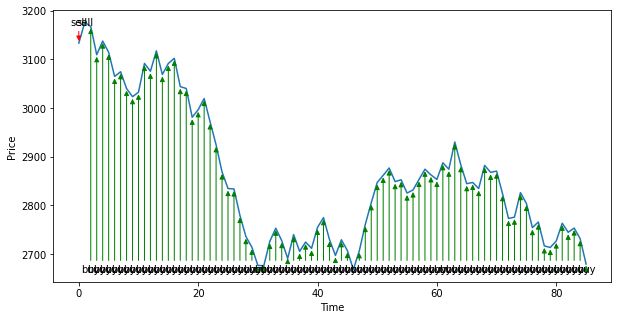

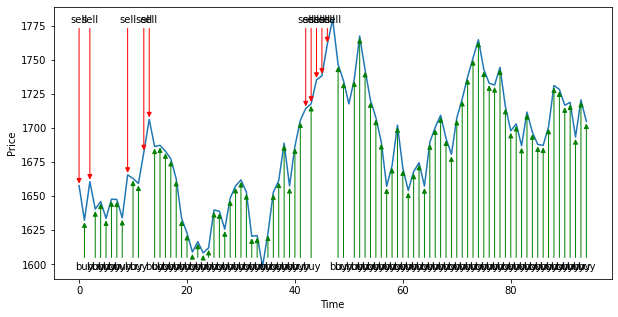

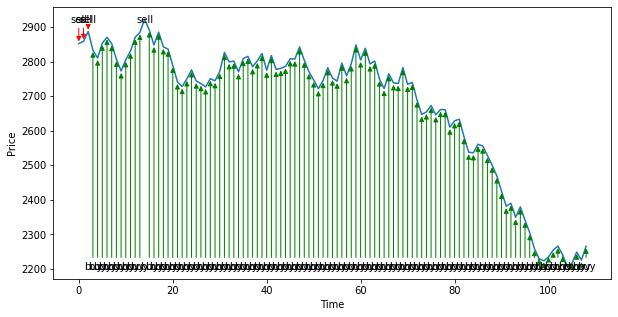

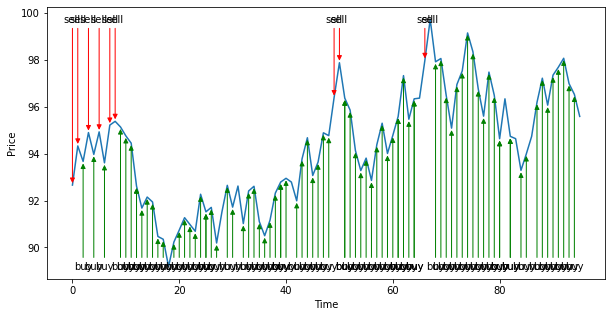

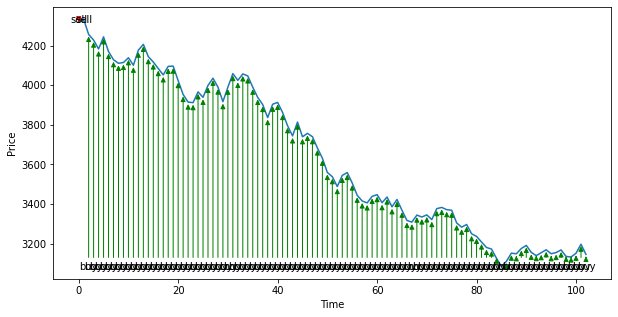

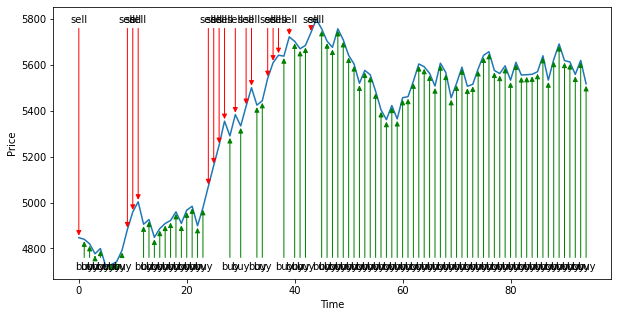

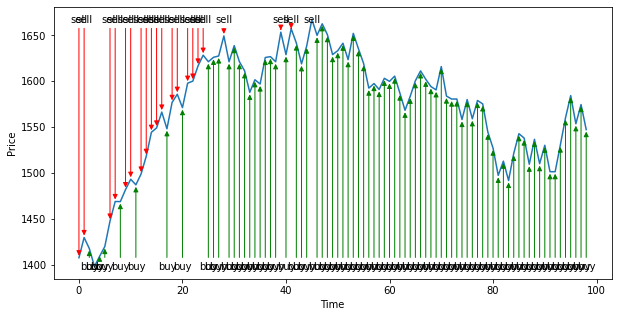

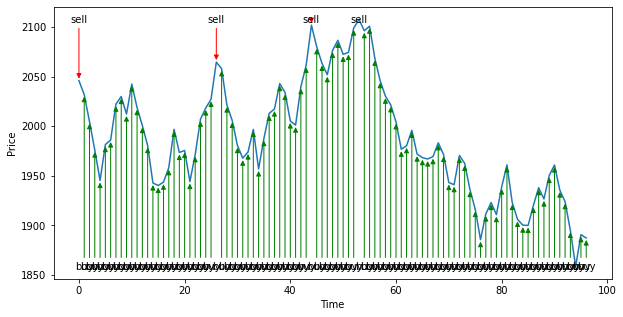

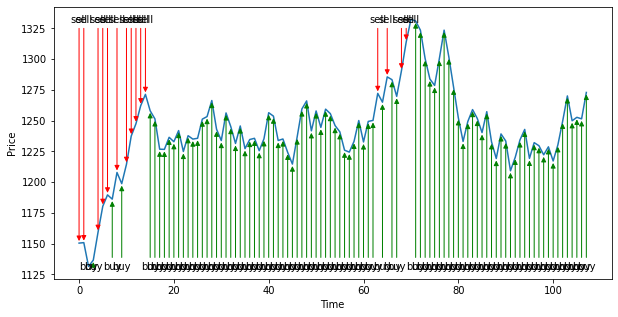

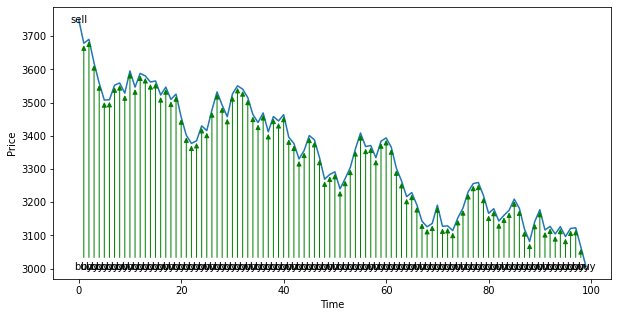

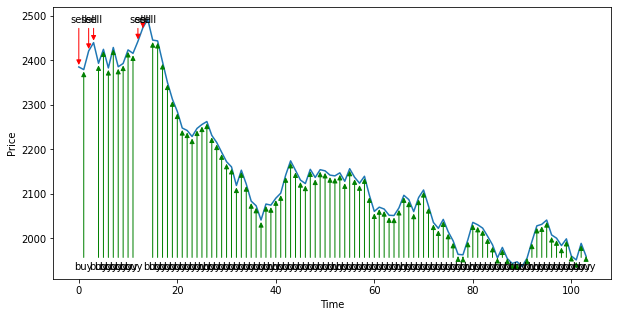

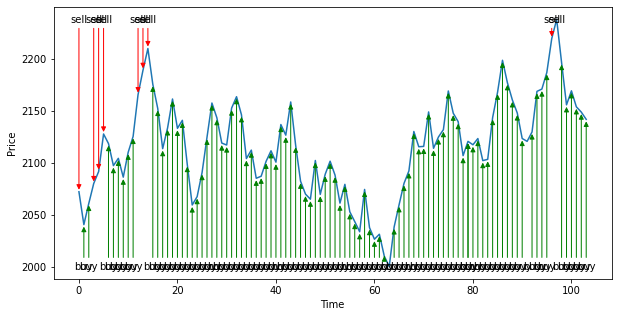

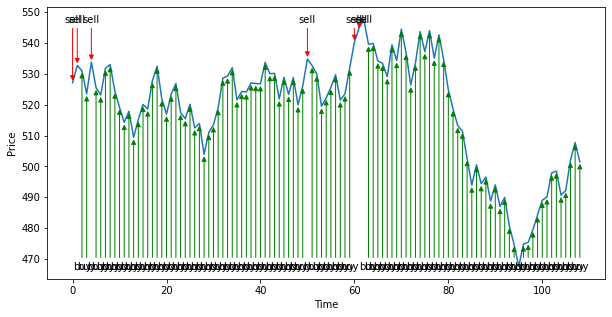

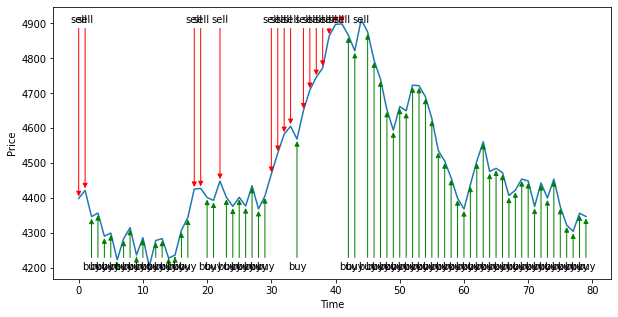

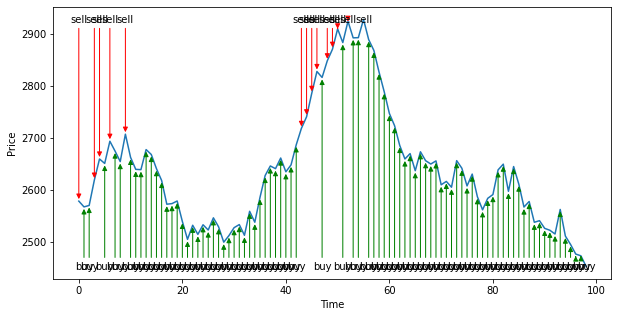

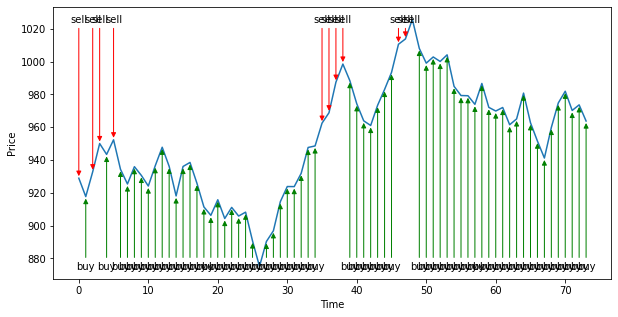

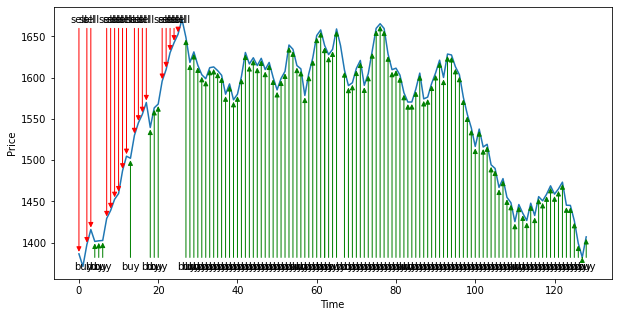

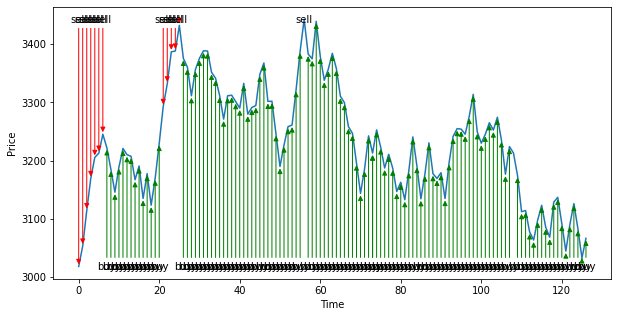

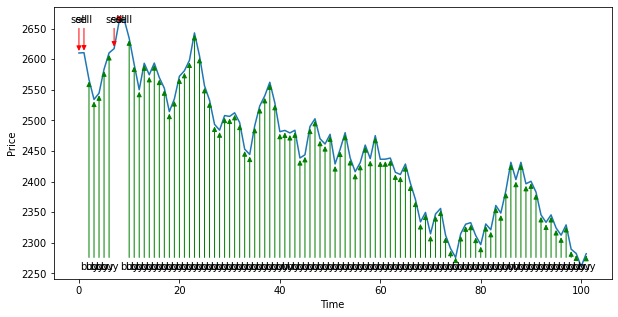

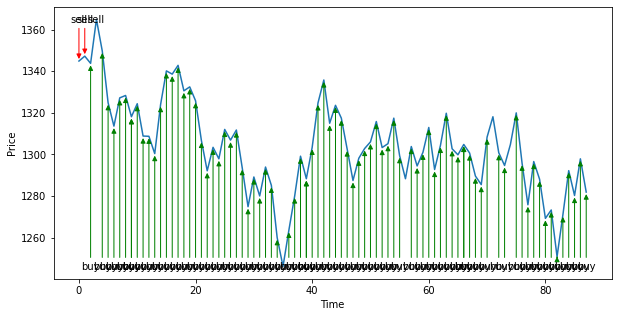

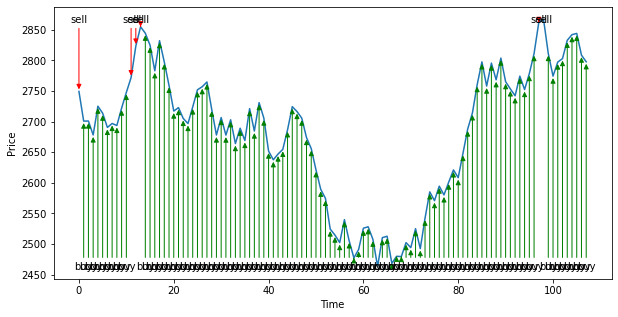

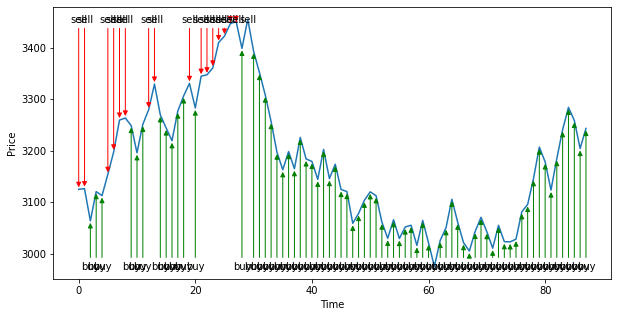

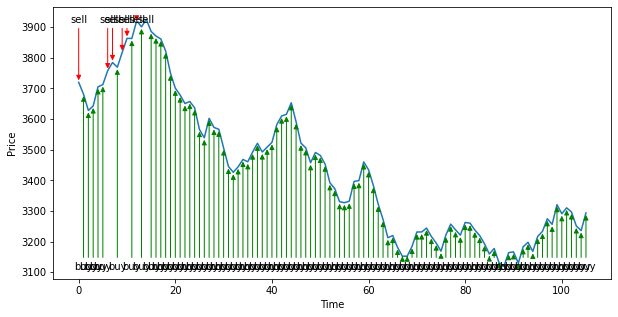

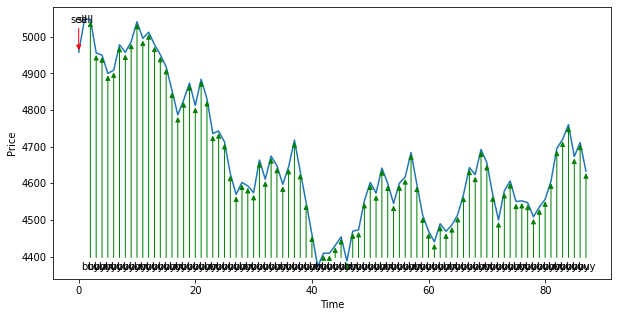

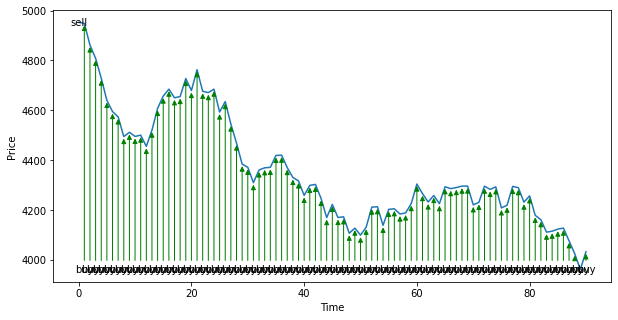

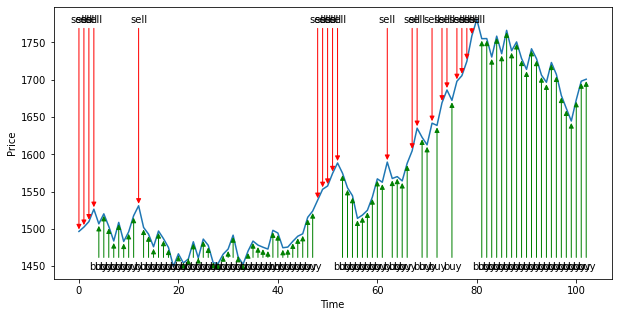

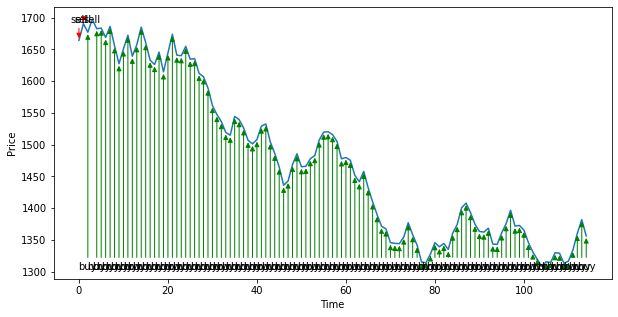

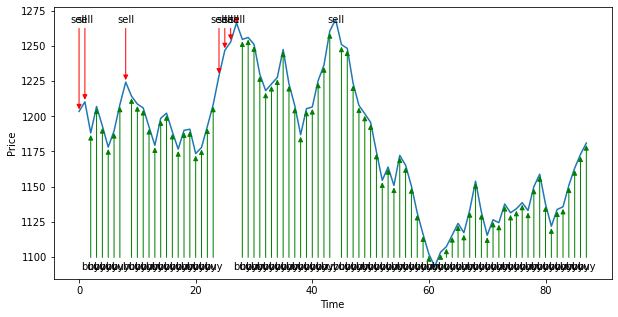

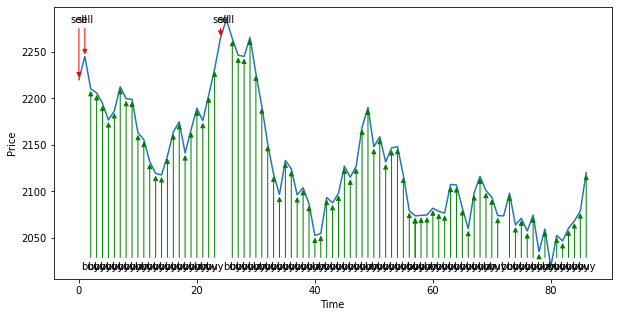

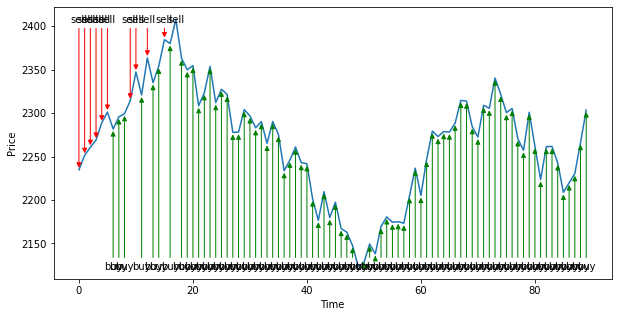

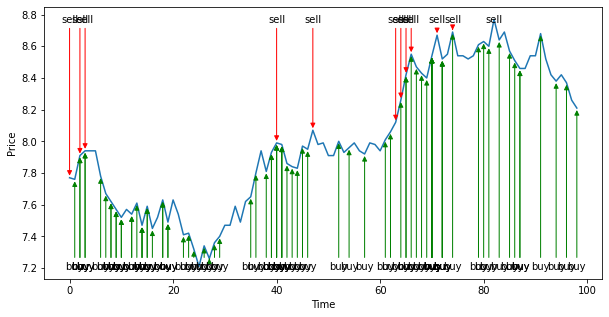

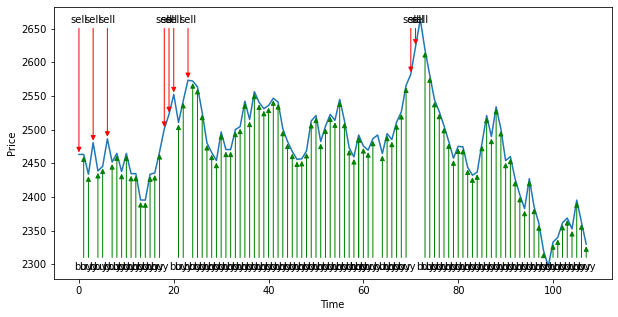

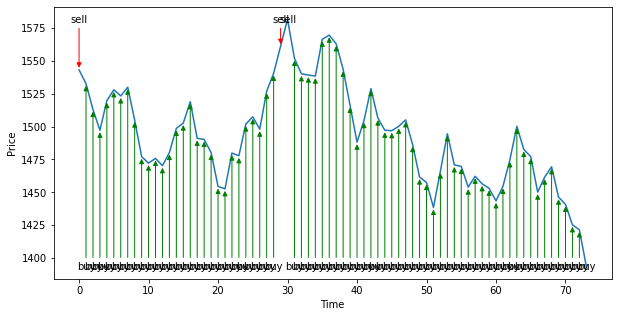

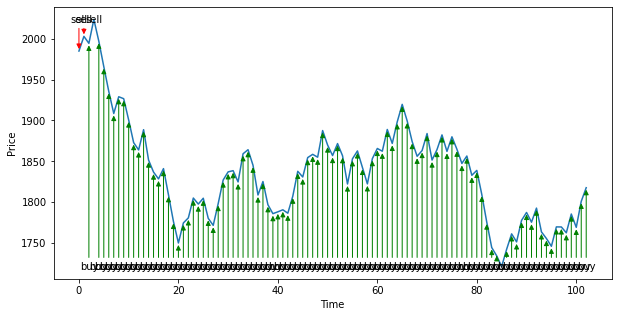

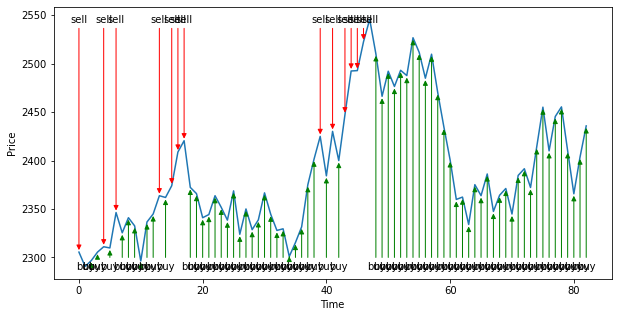

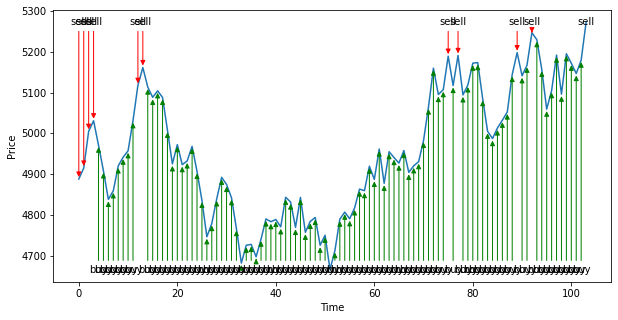

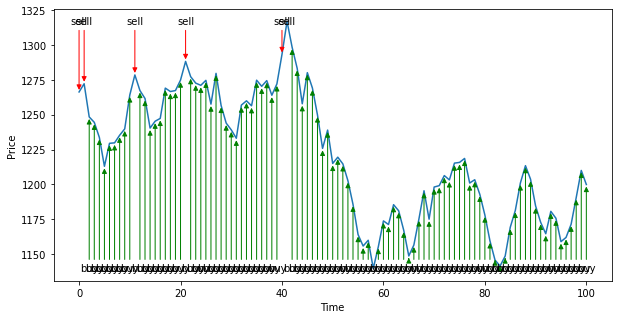

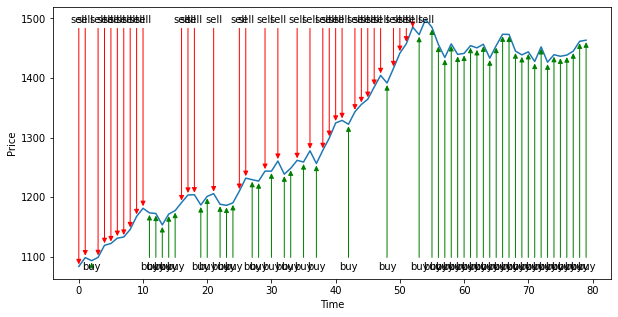

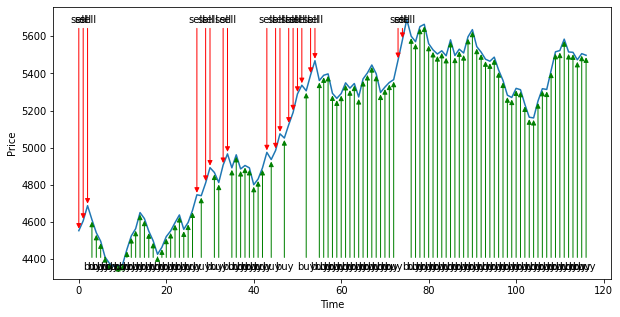

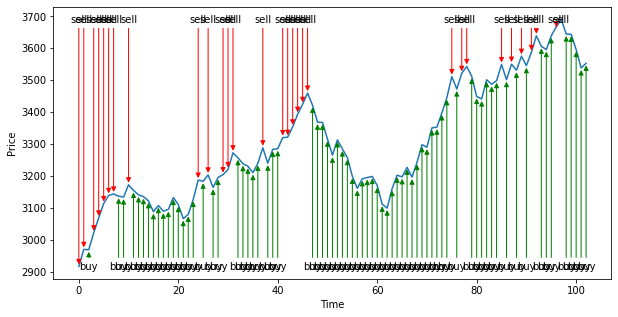

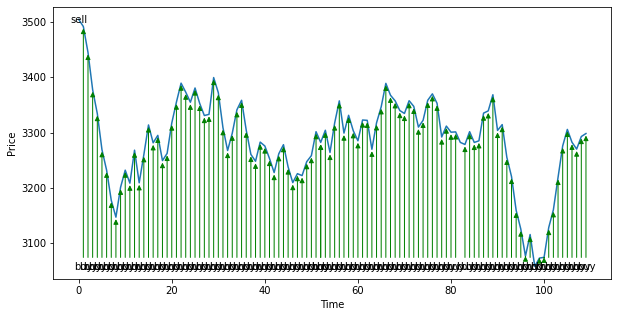

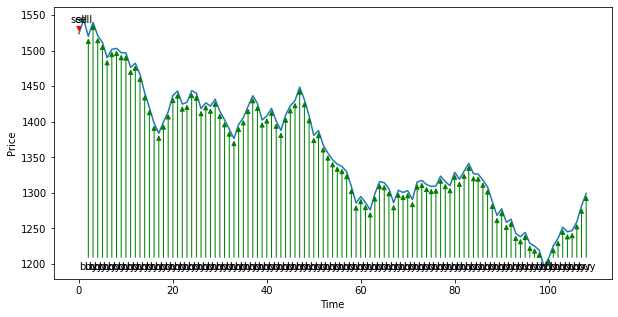

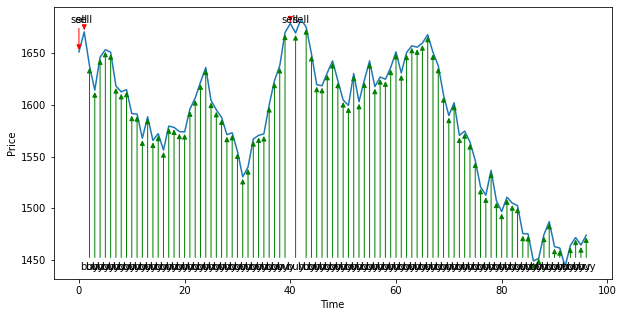

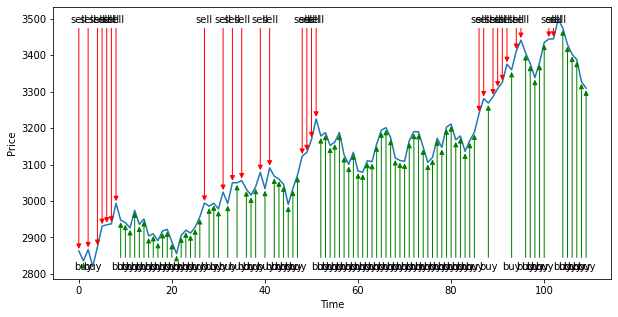

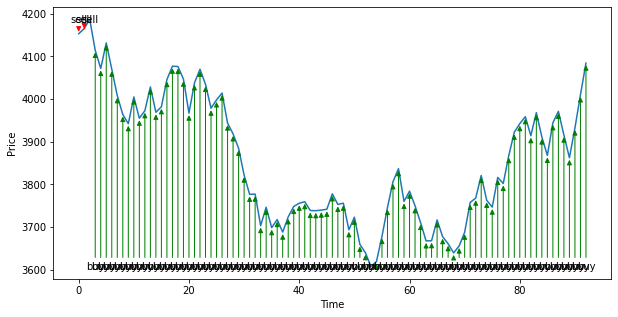

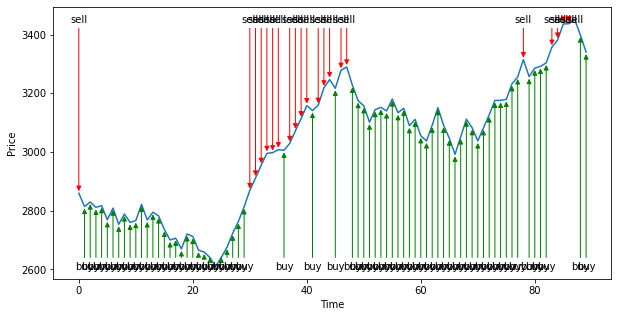

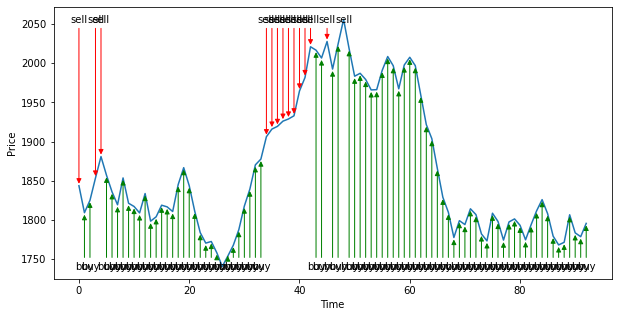

In [ ]:
for s in stocks:
  values = ordered_df[ordered_df['CUSIP']==s]['price'].to_list()
  plt.figure(figsize=(10,5))

  current_max = 0
  current = 0
  current_min = min(values)
  plt.plot(values)
  ax = plt.gcf().gca()
  for i,v in enumerate(values):
    current = v
    if current > current_max:
      current_max = current
      #print(current,current_max)
      ax.annotate('sell',
                  xy=(values.index(current_max), v),
                  xytext=(values.index(v), max(values)), 
                  va='center',
                  ha='center',
                  arrowprops=dict(arrowstyle= '-|>',color='red'),
                  )
    elif current < current_max:
      current_min = current
      ax.annotate('buy',
                  xy=(values.index(current_min), v),
                  xytext=(values.index(v), min(values)), 
                  va='center',
                  ha='center',
                  arrowprops=dict(arrowstyle= '-|>',color='green'),
                )
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.savefig(f'CUSIP_{s}.png')
  